## Abordagem Utilizando SVM: Bibliotecas

As bibliotecas utilizadas para esse problema foram as seguintes: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Funções Utilizadas

Para esse problema foram utilizadas as funções abaixo:

In [2]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = - 6, 6
    y_min, y_max = - 6, 6
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

## Dados de Treinamento

Foram gerados duzentos dados de treino, sendo os cem primeiros da classe 1 e os cem últimos da classe 2.

In [3]:
theta = np.linspace(0, 20, 100)

x1 = theta/4 * np.cos(theta)
y1 = theta/4 * np.sin(theta)

x2 = (theta/4 + 0.8) * np.cos(theta)
y2 = (theta/4 + 0.8) * np.sin(theta)

temp_x = np.array([x1, x2]).ravel()
temp_y = np.array([y1, y2]).ravel()
X = np.array([temp_x, temp_y]).T
y = []
for i in range(200):
    if i<100:
        y.append(1)
    else:
        y.append(2)
y = np.array(y)

## Solução do Problema

Para esse problema foi utilizado o kernel RBF e $C = 10000$.

In [4]:
clf = svm.SVC(kernel='rbf', C=10000)
clf.fit(X, y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Abaixo o plot dos vetores de suporte e da curva de decisão.

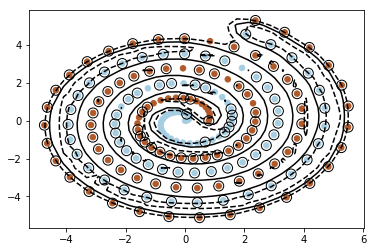

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=1,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Outro plot é mostrado abaixo.

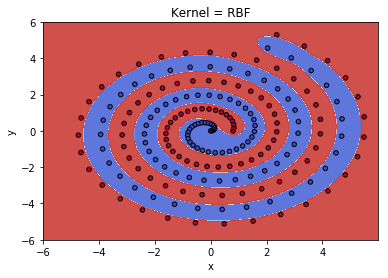

In [6]:
ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = RBF')

plt.show()

Utilizando um kernel linear o resultado foi o seguinte:

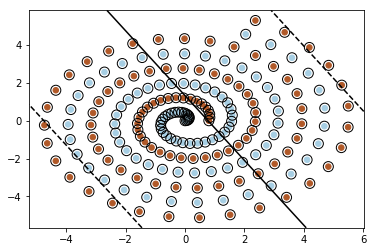

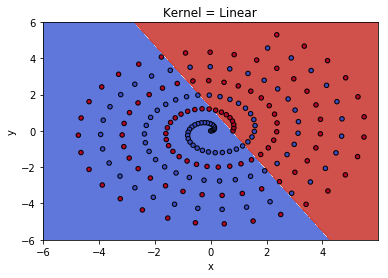

In [7]:
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=1,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = Linear')

plt.show()